In [2]:
pip install pandas numpy matplotlib seaborn plotly streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Coffee_Roasters.xlsx.xlsx")


In [5]:
df.head()

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2025,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2025,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2025,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2025,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2025,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   year              149116 non-null  int64  
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.5+ MB


In [7]:
df.isnull().sum()

transaction_id      0
year                0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df[df["transaction_qty"] <= 0]

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [10]:
df[df["unit_price"] <= 0]

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [11]:
df = df[(df["transaction_qty"] >0 ) & (df["unit_price"] >0 )]

In [12]:
df = df.drop_duplicates()

In [13]:
df["revenue"] = df["transaction_qty"] * df["unit_price"]

In [14]:
df["revenue"].describe()

count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: revenue, dtype: float64

In [15]:
product_volume = (
    df.groupby("product_id")["transaction_qty"]
    .sum()
    .reset_index()
    .sort_values(by="transaction_qty",ascending=False)
)

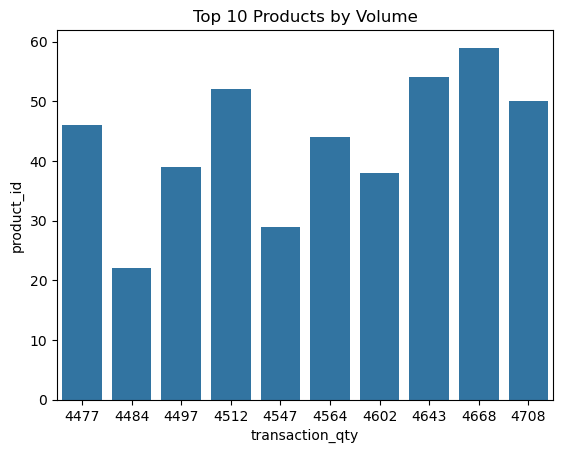

In [16]:
top_10 = product_volume.head(10)

plt.Figure(figsize=(10,5))
sns.barplot(x="transaction_qty",y="product_id",data=top_10)
plt.title("Top 10 Products by Volume")
plt.show()

In [17]:
product_revenue = (
    df.groupby("product_id")["revenue"]
    .sum()
    .reset_index()
    .sort_values(by="revenue", ascending=False)
)
total_revenue = product_revenue["revenue"].sum()
product_revenue["revenue_contribution_pct"] = (product_revenue["revenue"]/total_revenue)*100

In [18]:
category_revenue = (
    df.groupby("product_category")["revenue"]
    .sum()
    .reset_index()
)

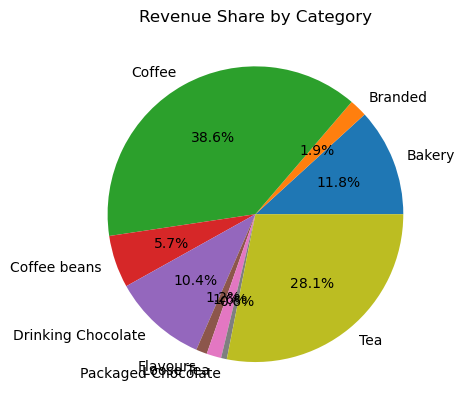

In [19]:
plt.pie(
    category_revenue["revenue"],
    labels=category_revenue["product_category"],
    autopct="%1.1f%%"
)
plt.title("Revenue Share by Category")
plt.show()

In [20]:
pareto = product_revenue.copy()
pareto["cumulative_revenue"] = pareto["revenue"].cumsum()
pareto["cumulative_pct"] = pareto["cumulative_revenue"]/ total_revenue * 100

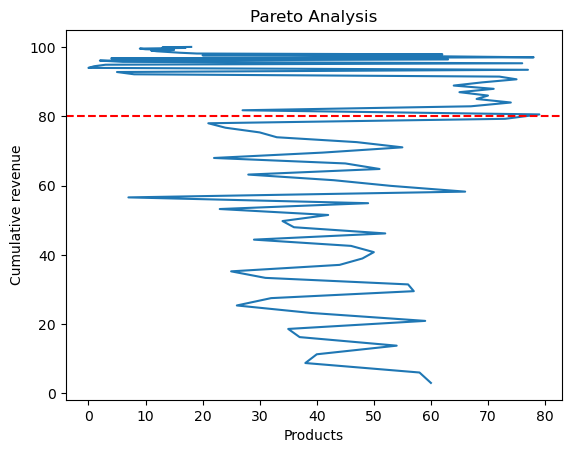

In [21]:
plt.plot(pareto["cumulative_pct"])
plt.axhline(80, color="red", linestyle="--")
plt.title("Pareto Analysis")
plt.ylabel("Cumulative revenue")
plt.xlabel("Products")
plt.show()

In [22]:
df.to_excel("cleaned_data.xlsx",index=False)

In [23]:
df = pd.read_excel("cleaned_data.xlsx")

In [24]:
df["revenue"] = df["transaction_qty"] * df["unit_price"]

In [25]:
df[["transaction_qty","unit_price","revenue"]].head()

,transaction_qty,unit_price,revenue
0,2,3.0,6.0
1,2,3.1,6.2
2,2,4.5,9.0
3,1,2.0,2.0
4,2,3.1,6.2


In [26]:
df["revenue"].describe()

count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: revenue, dtype: float64

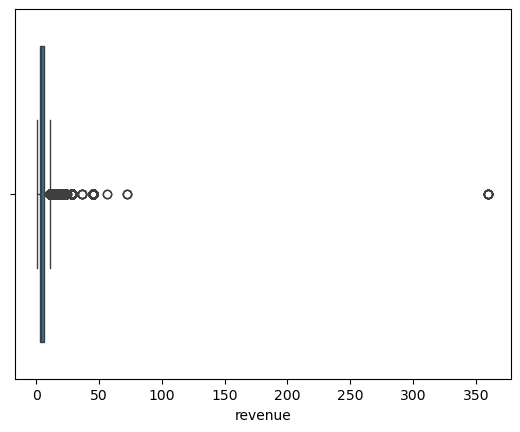

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["revenue"])
plt.show()

In [28]:
df.to_excel("final_data.xlsx", index=False)

In [29]:
product_volume = (
    df.groupby("product_id")["transaction_qty"]
    .sum()
    .reset_index()
    .sort_values(by="transaction_qty",ascending=False)
)

In [30]:
product_volume.head()

,product_id,transaction_qty
49,50,4708
58,59,4668
53,54,4643
37,38,4602
43,44,4564


In [31]:
product_volume["volume_rank"] = product_volume["transaction_qty"].rank(
    ascending=False,method="dense"
)
product_volume.head()

,product_id,transaction_qty,volume_rank
49,50,4708,1.0
58,59,4668,2.0
53,54,4643,3.0
37,38,4602,4.0
43,44,4564,5.0


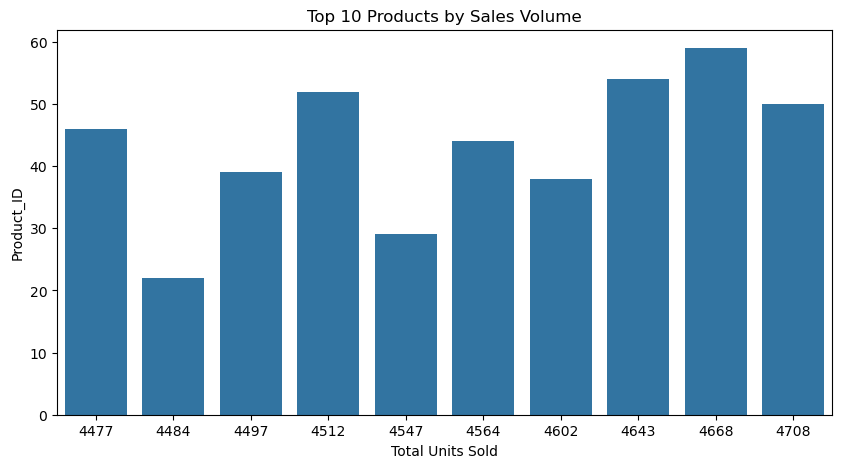

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_volume = product_volume.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x="transaction_qty",
    y="product_id",
    data=top_10_volume,
)
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("Total Units Sold")
plt.ylabel("Product_ID")
plt.show()

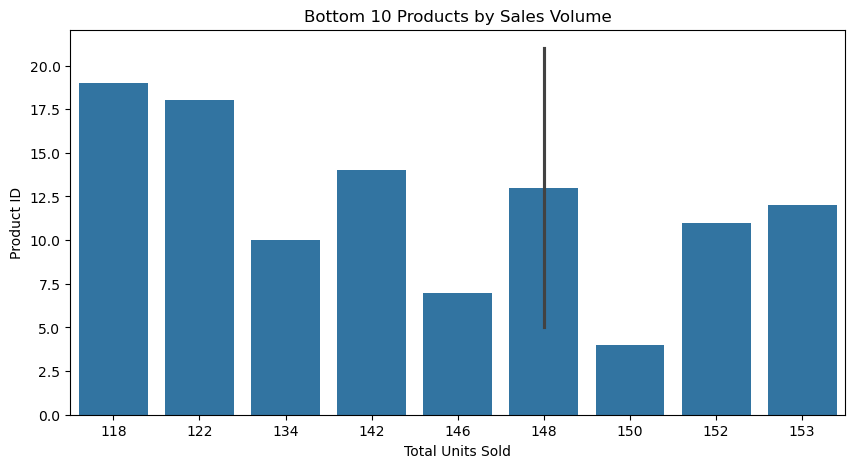

In [33]:
bottom_10_volume = product_volume.tail(10)
plt.figure(figsize=(10,5))
sns.barplot(
    x="transaction_qty",
    y="product_id",
    data=bottom_10_volume,
)
plt.title("Bottom 10 Products by Sales Volume")
plt.xlabel("Total Units Sold")
plt.ylabel("Product ID")
plt.show()

In [34]:
product_volume.to_excel("product_volume.xlsx",index=False)

In [35]:
product_revenue = (
    df.groupby("product_id")["revenue"]
    .sum()
    .reset_index()
    .sort_values(by="revenue",ascending=False)
)
product_revenue.head()

,product_id,revenue
60,61,21151.75
58,59,21006.00
38,39,19112.25
40,41,17641.75
54,55,17384.00


In [36]:
product_revenue["revenue_rank"]=product_revenue["revenue"].rank(
    ascending=False, method="dense"
)

In [37]:
total_revenue = product_revenue["revenue"].sum()
product_revenue["revenue_contribution_pct"] = (
    product_revenue["revenue"] / total_revenue
) * 100
product_revenue.head()

,product_id,revenue,revenue_rank,revenue_contribution_pct
60,61,21151.75,1.0,3.026814
58,59,21006.00,2.0,3.005957
38,39,19112.25,3.0,2.734962
40,41,17641.75,4.0,2.524533
54,55,17384.00,5.0,2.487649


In [38]:
comparison = pd.merge(
    product_volume,
    product_revenue,
    on= "product_id"
)

In [39]:
comparison[[
    "product_id",
    "transaction_qty",
    "volume_rank",
    "revenue",
    "revenue_rank",
    "revenue_contribution_pct"
]].head(10)

,product_id,transaction_qty,volume_rank,revenue,revenue_rank,revenue_contribution_pct
0,50,4708,1.0,11770.00,26.0,1.684286
1,59,4668,2.0,21006.00,2.0,3.005957
2,54,4643,3.0,11607.50,29.0,1.661033
3,38,4602,4.0,17257.50,6.0,2.469547
4,44,4564,5.0,11410.00,30.0,1.632770
5,29,4547,6.0,11367.50,31.0,1.626689
6,52,4512,7.0,11280.00,32.0,1.614167
7,39,4497,8.0,19112.25,3.0,2.734962
8,22,4484,9.0,8968.00,41.0,1.283320
9,46,4477,10.0,11192.50,33.0,1.601646


In [40]:
comparison["rank_diff"] = comparison["volume_rank"] - comparison["revenue_rank"]
comparison.sort_values(by="rank_diff").head(10)

,product_id,transaction_qty,volume_rank,revenue,revenue_rank,revenue_contribution_pct,rank_diff
8,22,4484,9.0,8968.0,41.0,1.283320,-32.0
11,31,4433,12.0,9752.6,39.0,1.395596,-27.0
2,54,4643,3.0,11607.5,29.0,1.661033,-26.0
0,50,4708,1.0,11770.0,26.0,1.684286,-25.0
6,52,4512,7.0,11280.0,32.0,1.614167,-25.0
4,44,4564,5.0,11410.0,30.0,1.632770,-25.0
5,29,4547,6.0,11367.5,31.0,1.626689,-25.0
9,46,4477,10.0,11192.5,33.0,1.601646,-23.0
46,64,2372,46.0,1897.6,69.0,0.271546,-23.0
43,84,2658,43.0,2126.4,66.0,0.304288,-23.0


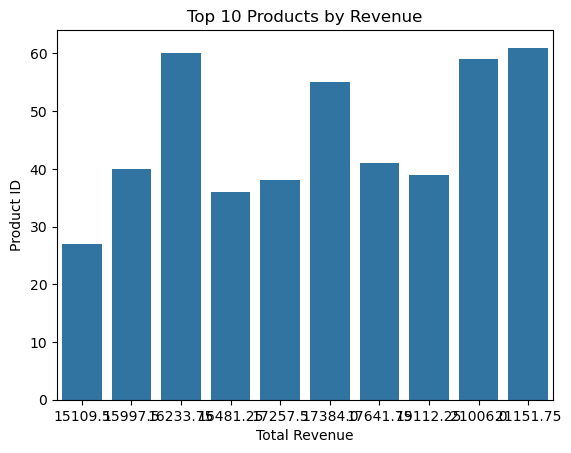

In [41]:
top_10_revenue = product_revenue.head(10)
plt.Figure(figsize=(10,5))
sns.barplot(
    x="revenue",
    y="product_id",
    data=top_10_revenue
)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product ID")
plt.show()

In [42]:
product_revenue.to_excel("product_revenue.xlsx",index=False)
comparison.to_excel("volume_vs_revenue_comparison.xlsx",index=False)

In [43]:
category_revenue = (
    df.groupby("product_category")["revenue"]
    .sum()
    .reset_index()
    .sort_values(by="revenue",ascending=False)
)
category_revenue["category_revenue_share_pct"] = (
    category_revenue["revenue"] / category_revenue["revenue"].sum()
) * 100
category_revenue

,product_category,revenue,category_revenue_share_pct
2,Coffee,269952.45,38.630178
8,Tea,196405.95,28.105679
0,Bakery,82315.64,11.779363
4,Drinking Chocolate,72416.00,10.362725
3,Coffee beans,40085.25,5.736197
1,Branded,13607.00,1.947161
6,Loose Tea,11213.60,1.604665
5,Flavours,8408.80,1.203299
7,Packaged Chocolate,4407.64,0.630733


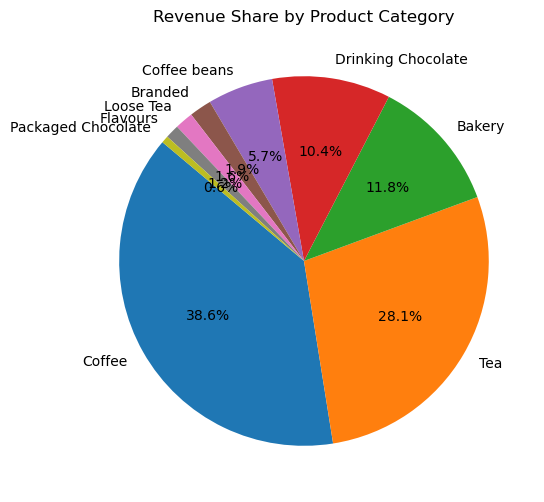

In [44]:
plt.figure(figsize=(6,6))
plt.pie(
    category_revenue["revenue"],
    labels=category_revenue["product_category"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Revenue Share by Product Category")
plt.show()

In [45]:
product_type_revenue = (
    df.groupby(["product_category","product_type"])["revenue"]
    .sum()
    .reset_index()
    .sort_values(by="revenue",ascending=False)
)
product_type_revenue.head()

,product_category,product_type,revenue
5,Coffee,Barista Espresso,91406.20
26,Tea,Brewed Chai tea,77081.95
16,Drinking Chocolate,Hot chocolate,72416.00
7,Coffee,Gourmet brewed coffee,70034.60
25,Tea,Brewed Black tea,47932.00


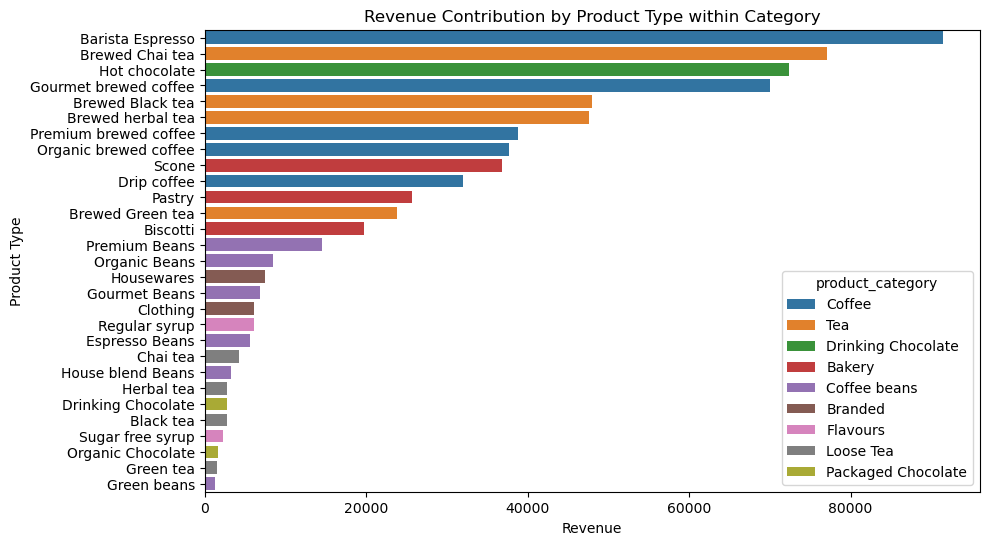

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="revenue",
    y="product_type",
    hue="product_category",
    data=product_type_revenue
)
plt.title("Revenue Contribution by Product Type within Category")
plt.xlabel("Revenue")
plt.ylabel("Product Type")
plt.show()

In [47]:
category_revenue.to_excel("category_revenue.xlsx",index=False)
product_type_revenue.to_excel("product_type_revenue.xlsx",index=False)

In [48]:
pareto_df = product_revenue.copy()
pareto_df = pareto_df.sort_values(by="revenue", ascending=False)

In [49]:
pareto_df["cumulative_revenue"] = pareto_df["revenue"].cumsum()
total_revenue = pareto_df["revenue"].sum()
pareto_df["cumulative_revenue_pct"] = (
    pareto_df["cumulative_revenue"] / total_revenue
) * 100
pareto_df.head(10)

,product_id,revenue,revenue_rank,revenue_contribution_pct,cumulative_revenue,cumulative_revenue_pct
60,61,21151.75,1.0,3.026814,21151.75,3.026814
58,59,21006.00,2.0,3.005957,42157.75,6.032771
38,39,19112.25,3.0,2.734962,61270.00,8.767733
40,41,17641.75,4.0,2.524533,78911.75,11.292266
54,55,17384.00,5.0,2.487649,96295.75,13.779916
37,38,17257.50,6.0,2.469547,113553.25,16.249463
35,36,16481.25,7.0,2.358466,130034.50,18.607929
59,60,16233.75,8.0,2.323049,146268.25,20.930977
39,40,15997.50,9.0,2.289241,162265.75,23.220219
26,27,15109.50,10.0,2.162168,177375.25,25.382387


In [50]:
top_80_products = pareto_df[pareto_df["cumulative_revenue_pct"] <= 80]
top_80_products.shape

(42, 6)

In [51]:
product_concentration_pct = (
    top_80_products.shape[0] / pareto_df.shape[0]
) * 100
product_concentration_pct

52.5

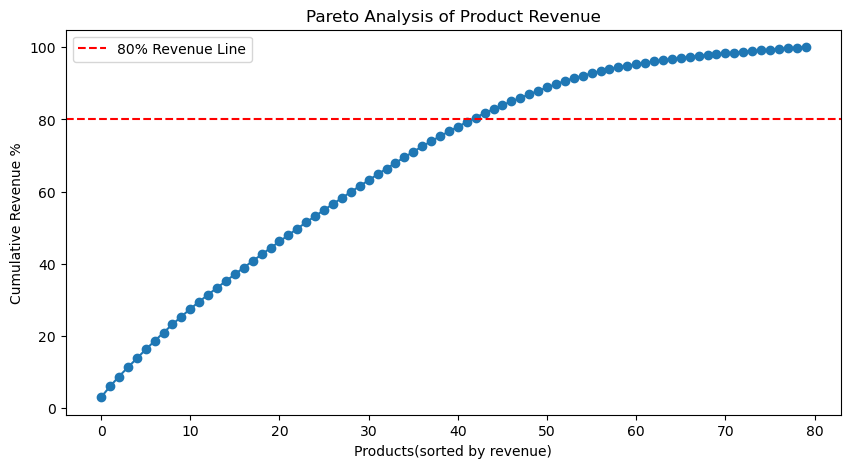

In [52]:
plt.figure(figsize=(10,5))
plt.plot(pareto_df["cumulative_revenue_pct"].values, marker="o")
plt.axhline(80,color="red",linestyle="--", label="80% Revenue Line")
plt.xlabel("Products(sorted by revenue)")
plt.ylabel("Cumulative Revenue %")
plt.title("Pareto Analysis of Product Revenue")
plt.legend()
plt.show()

In [53]:
pareto_df.to_excel("pareto_analysis.xlsx", index=False)


In [54]:
total_revenue = df["revenue"].sum()
total_transactions = df["transaction_id"].nunique()
total_products = df["product_id"].nunique()
total_categories = df["product_category"].nunique()

In [55]:
revenue_concentration_ratio = (
    top_80_products.shape[0] / total_products
)

In [56]:
product_efficiency = (
    product_revenue["revenue"].sum() / total_products
)

In [57]:
kpi_table = pd.DataFrame({
    "KPI": [
        "Total Revenue",
        "Total Transactions",
        "Total Products",
        "Total Categories",
        "Revenue Concentration Ratio (80%)",
        "Average Revenue Per Product"
    ],
    "Value":[
        total_revenue,
        total_transactions,
        total_products,
        total_categories,
        revenue_concentration_ratio,
        product_efficiency
    ]
})

kpi_table

,KPI,Value
0,Total Revenue,698812.330000
1,Total Transactions,149116.000000
2,Total Products,80.000000
3,Total Categories,9.000000
4,Revenue Concentration Ratio (80%),0.525000
5,Average Revenue Per Product,8735.154125


In [58]:
kpi_table.to_excel("kpi_summary.xlsx",index=False)

In [59]:

product_sales = (
    df.groupby('product_detail')['transaction_qty']
      .sum()
      .reset_index()
      .sort_values(by='transaction_qty', ascending=False)
)


product_revenue = (
    df.groupby('product_detail')['revenue']
      .sum()
      .reset_index()
      .sort_values(by='revenue', ascending=False)
)


category_revenue = (
    df.groupby('product_category')['revenue']
      .sum()
      .reset_index()
)


product_type_revenue = (
    df.groupby(['product_category','product_type'])['revenue']
      .sum()
      .reset_index()
)


pareto_table = product_revenue.copy()
pareto_table['cumulative_revenue'] = pareto_table['revenue'].cumsum()
total_rev = pareto_table['revenue'].sum()
pareto_table['cumulative_pct'] = pareto_table['cumulative_revenue'] / total_rev * 100


In [60]:
with pd.ExcelWriter("powerbi_output.xlsx") as writer:
    product_sales.to_excel(writer, sheet_name='Product_Sales', index=False)
    product_revenue.to_excel(writer, sheet_name='Product_Revenue', index=False)
    category_revenue.to_excel(writer, sheet_name='Category_Revenue', index=False)
    product_type_revenue.to_excel(writer, sheet_name='Product_Type_Revenue', index=False)
    pareto_table.to_excel(writer, sheet_name='Pareto', index=False)
